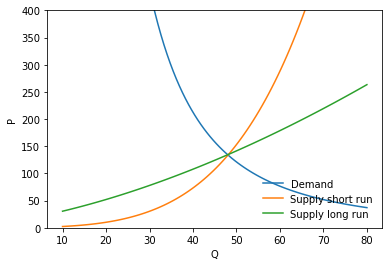

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv("https://uit-sok-1006-v22.github.io/seminarer/chickendata.csv",delimiter=";")


q = np.linspace(10,80,100)

def demand_curve(df,year,q):
    #eq 14
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/d['CPI'])
    cpi=d['CPI']
    
    demand=np.exp((np.log(q)-(-4.507+0.841*y+0.277*pb))/(-0.397))*cpi
    
    return demand

def supply_curve_long_run(df,year,q):
    #eq 15
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/d['CPI'])
    t=year-1909
    cpi=d['CPI']
    
    supply=np.exp(((1-0.631)*np.log(N*q+X)-(2.030-0.146*pf+0.0184*t))/0.221)*cpi
    return supply

def supply_curve_short_run(df,year,q):
    #eq 16
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/d['CPI'])
    t=year-1909
    qprod=np.log(d['QPRODA']/1439)
    cpi=d['CPI']
    
    supply=np.exp((np.log(N*q+X)-(2.030-0.146*pf+0.0184*t+0.631*qprod))/0.221)*cpi
    
    return supply


def plot_year(df,year):
    fig,ax=plt.subplots()
    ax.set_ylabel('P')
    ax.set_xlabel('Q')


    #plotting the function
    q = np.linspace(10,80,100)
    ax.plot(q,demand_curve(df,year,q)
            ,label='Demand')
    ax.plot(q,supply_curve_short_run(df,year,q)
            ,label='Supply short run')
    ax.plot(q,supply_curve_long_run(df,year,q)
            ,label='Supply long run')
    ax.set_ylim([0, 400])

    ax.legend(loc='lower right',frameon=False)

plot_year(df,1995) 
